In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [31]:
# Load dataset
data = pd.read_csv("Mall_Customers.csv")

In [32]:
# Preprocessing: Encode categorical data
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [33]:
# Select relevant features
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [34]:
# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [35]:
# Optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

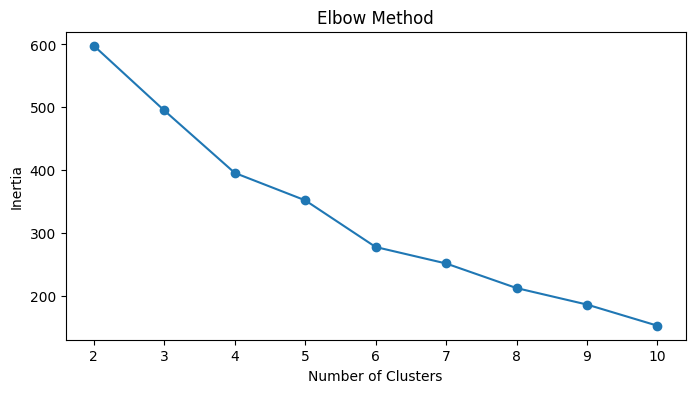

In [36]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

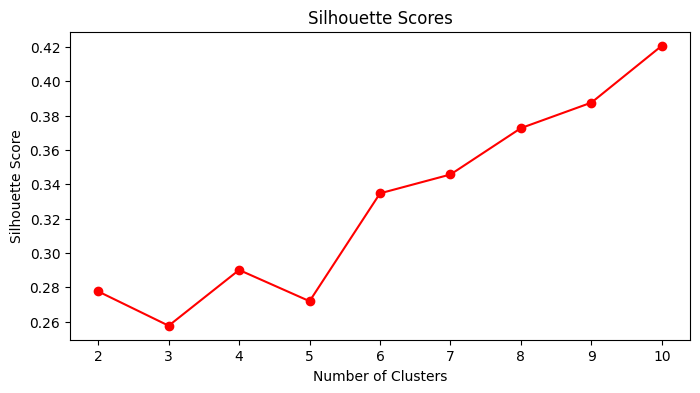

In [37]:
# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [38]:
# Choose optimal number of clusters based on analysis
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 karena range mulai dari 2
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 10


In [39]:
# Fit K-Means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=10, random_state=42)

In [40]:
# Evaluate final clustering
final_silhouette_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Final Silhouette Score: {final_silhouette_score}")

Final Silhouette Score: 0.42076374869477745


In [41]:
# Save clustered dataset
data.to_csv("Clustered_Customers.csv", index=False)